In [1]:
import numpy as np

from utils.main import *
from visualization_generation.plots import *
from models.point_cloud import *
from matplotlib.patches import Circle

In [2]:
n = 10
k = 6

In [3]:
points = np.array([(i, i) for i in range(n)])

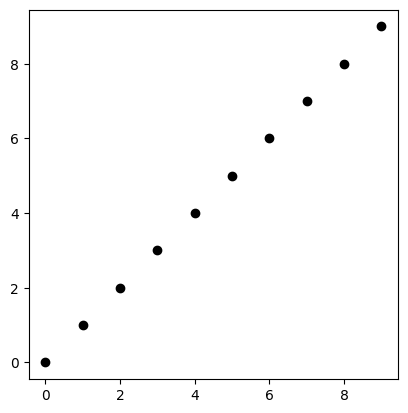

In [4]:
plot_2d(points)

In [5]:
point_cloud = PointCloud()
point_cloud.non_random_constructor(points, np.array([n // 2, n // 2]))

In [6]:
point_cloud.get_query_points()

array([[5, 5]])

In [7]:
point_cloud._get_distances_and_indices(neighborhood_size=k)

(array([[1.41421356, 1.41421356, 2.82842712, 2.82842712, 4.24264069,
         4.24264069]]),
 array([[4, 6, 7, 3, 2, 8]], dtype=int64))

In [8]:
neighborhoods = point_cloud.get_neighborhoods(neighborhood_size=k)
sorted(neighborhoods[0], key=lambda x: x[0])

[array([2, 2]),
 array([3, 3]),
 array([4, 4]),
 array([6, 6]),
 array([7, 7]),
 array([8, 8])]

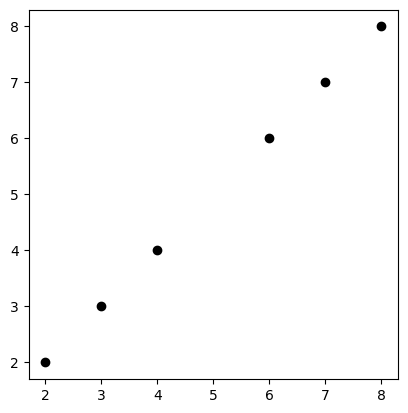

In [9]:
plot_2d(neighborhoods[0])

In [10]:
annulus = point_cloud._get_annulus(point_cloud.get_query_points()[0], (2 * (5 - 2) ** 2) ** (1/2), 0)
annulus

(array([[3, 3],
        [4, 4],
        [6, 6],
        [7, 7]]),
 4.242640687119285,
 0)

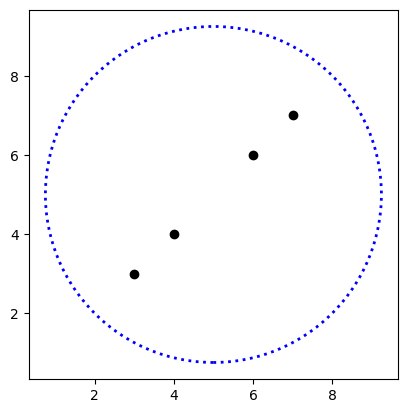

In [11]:
data = annulus[0]

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], c='black')
plt.gca().set_aspect('equal')
max_r = Circle((n// 2, n // 2), annulus[1], fill=False, linestyle='dotted', color='b', linewidth=2)
min_r = Circle((n// 2, n // 2), annulus[2], fill=False, linestyle='dotted', color='b', linewidth=2)
ax.add_patch(max_r)
ax.add_patch(min_r)
plt.show()

In [12]:
min_to_max_s_ratio = 0.75
r_to_s_ratio = 0.3
n_steps = 3

In [13]:
annulus = point_cloud.get_annuli2(neighborhood_size=k, min_to_max_s_ratio=min_to_max_s_ratio, r_to_s_ratio=r_to_s_ratio, n_steps=3)
annulus[0]

[(array([[3, 3],
         [4, 4],
         [6, 6],
         [7, 7]]),
  3.181980515339464,
  0.954594154601839),
 (array([[3, 3],
         [4, 4],
         [6, 6],
         [7, 7]]),
  3.7123106012293743,
  1.1136931803688122),
 (array([[3, 3],
         [4, 4],
         [6, 6],
         [7, 7]]),
  4.242640687119285,
  1.2727922061357855)]

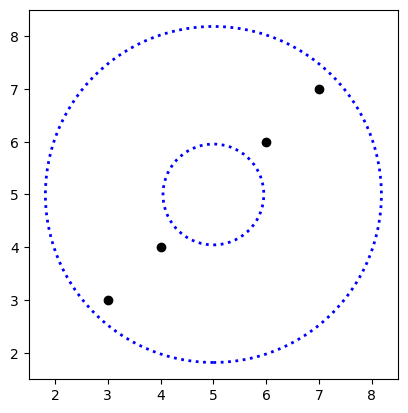

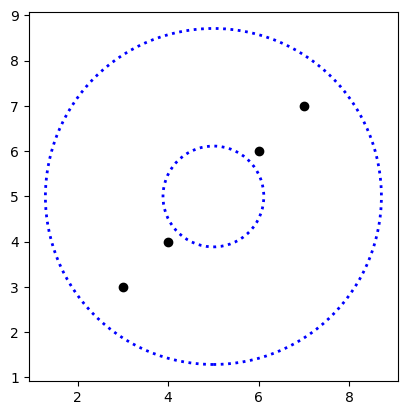

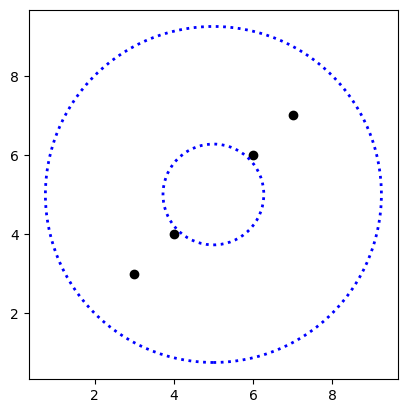

In [14]:
for annulus in annulus[0]:
    data = annulus[0]
    
    fig, ax = plt.subplots()
    ax.scatter(data[:, 0], data[:, 1], c='black')
    plt.gca().set_aspect('equal')
    max_r = Circle((n// 2, n // 2), annulus[1], fill=False, linestyle='dotted', color='b', linewidth=2)
    min_r = Circle((n// 2, n // 2), annulus[2], fill=False, linestyle='dotted', color='b', linewidth=2)
    ax.add_patch(max_r)
    ax.add_patch(min_r)
    plt.show()

Add 0.1 to max_r and the points show, so it is because of kd tree.